In [1]:
from utilities import time_evolve
from construct_H_tree import construct_H_tree
from Species import Ca40
from structures import Laser, Chain
from Chamber import Chamber

from math import sqrt
import numpy as np

ion = Ca40([("S1/2", -1/2, "S"),  ("P3/2", -1/2, "P"), ("D5/2", -1/2, "D")])

chain = Chain([ion], trap_freqs=[3e6, 3e6, 1e6], selected_modes=[])

mode = chain.modes[-1]
mode.modecutoff(2)

chain.selected_modes = [mode] # consider one mode

laser = Laser(phi=0, k_hat=np.array([1,0,1])/sqrt(2), eps_hat = np.array([1, 0, -1])/sqrt(2))
chamber = Chamber(chain = chain, lasers = [laser], 
                B = 4e-4, Bhat = np.array([0,0,1]))

chamber.set_laser_wavelength_from_transition(0, ion.transition(("S", "D")))
chamber.set_laser_intensity_from_pi_time(0, 2e-6, ion.transition(("S", "D")))

timescale = 1e-6

H = construct_H_tree(chamber, timescale)
H.apply_single_photon_adiabatic_elimination(threshold = 1e-3)
H.apply_ld_and_rwa_approximations(n_cutoff = mode.N, ld_cond_th = 1e-2, rwa_cutoff='inf')


WEAKLY COUPLED TRANSITIONS: [(0, 1, 0), (0, 2, 1)]
TRANSITION PROBS: {(0, 0, 1, 0): 5.588310568506957e-12, (0, 0, 2, 1): 8.548977098889967e-11}
Expanding to 2nd order in the Lamb-Dicke approximation


10.0%. Run time:   0.03s. Est. time left: 00:00:00:00
20.0%. Run time:   0.05s. Est. time left: 00:00:00:00
30.0%. Run time:   0.07s. Est. time left: 00:00:00:00
40.0%. Run time:   0.09s. Est. time left: 00:00:00:00
50.1%. Run time:   0.11s. Est. time left: 00:00:00:00
60.1%. Run time:   0.13s. Est. time left: 00:00:00:00
70.1%. Run time:   0.15s. Est. time left: 00:00:00:00
80.1%. Run time:   0.17s. Est. time left: 00:00:00:00
90.1%. Run time:   0.19s. Est. time left: 00:00:00:00
100.0%. Run time:   0.20s. Est. time left: 00:00:00:00
Total run time:   0.20s


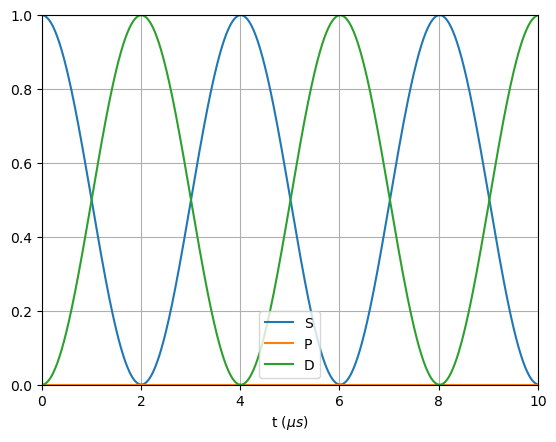

In [2]:
from qutip import tensor
duration = 10
times = np.linspace(0, duration,  1000)

psi_ion = ion.state["S"]
psi_mot = mode.setstate(0)
psi_0 = tensor(psi_ion, psi_mot)

proj_S = chain.ion_projector(1, "S")
proj_P = chain.ion_projector(1, "P")
proj_D = chain.ion_projector(1, "D")

results = time_evolve(H, psi_0, times, expt_ops=[proj_S, proj_P, proj_D], progress_bar= True)
results.quick_plot()